In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as p
#import skimage
import array as a

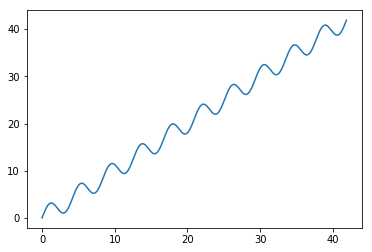

In [49]:
k=10000
x=np.linspace(0,(2* np.pi / (1.5 * 1000)) * k,1000)
y=a.array('f',)
for i in range (1000):
    y.append((x[i]+2*m.sin(1.5*x[i])))
p.plot(x,y)

In [50]:
def cost_der(theta, X, Y):
    t = np.matrix(np.zeros(theta.shape));
    t[0] = sum(np.matmul(X, theta) - Y);
    t[1] = sum(np.multiply((np.matmul(X, theta) - Y), X[:,1]));
    return t;

In [51]:
def GD(X,Y):
    theta=np.matrix([1,1]).T
    a=0.001
    for i in range (100):
        theta=theta-a*cost_der(theta,X,Y);
    return theta

[[20.94395103]
 [11.99408468]]


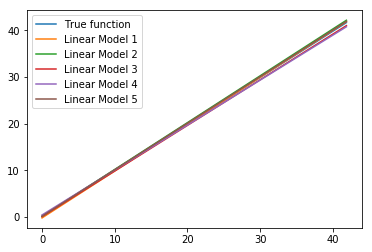

1265.2771595911975
96.03756032103095
2089.26222069747
error: 9.5070864375435e-11


In [52]:
X_temp = np.matrix(x).T;
X = (X_temp - np.mean(x))/np.std(x);
ONES = np.matrix(np.ones(len(x))).T;
X = np.concatenate((ONES, X), axis = 1);
Y=np.matrix(y)
theta=GD(X,Y.T)
print(theta)
t_f=np.matmul(X,theta)
p.plot(x,t_f,label='True function')
n=5
f = np.zeros((n,len(x)));
for i in range (n):
    mu=0
    sigma=10
    noise = np.random.normal(mu, sigma, [1000,1])
    z=Y.T+noise
    theta=GD(X,z)
    #print(theta)
    ans=np.matmul(X,theta)
    p.plot(x,ans,label = 'Linear Model ' + str(i+1))
    f[i]=ans.T
p.legend()
p.show()
#p.plot(X_temp,z)
#print(f)
M=np.mean(f,axis=0)
M=np.matrix(M)
bias=Y-M
#print(M.shape)
print(np.sum(abs(bias)))
#3print(Y[0],M[0],bias[0])

Variance = np.mean(np.power(f,2),axis=0)-np.power(M,2) #np.mean(f - np.mean(f, axis = 0),axis = 0);
#print(Variance)
Variance_value = np.sum((Variance));
print(Variance_value)


MSE = np.mean(np.power((Y - f), 2),axis = 0);
#MSE=np.mean(np.multiply(f,f),axis=0)+np.multiply(Y,Y)-2*np.multiply(Y,M)
MSE_value = np.sum((MSE));
print(MSE_value)

error=abs(MSE-np.multiply(bias,bias)-Variance)
#print(error)
print('error:', np.sum(error))

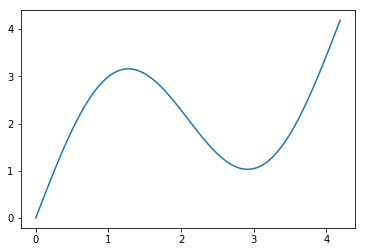

In [26]:
##############################################################################3
k=10000
x=np.linspace(0,(2* np.pi / (1.5 * 1000)) * k,100)
y=a.array('f',)
for i in range (100):
    y.append((x[i]+2*m.sin(1.5*x[i])))
p.plot(x,y)

In [24]:
def cost_der2(theta, X, Y):
    t_d = np.matrix(np.zeros(theta.shape));
    for i in range(4):
        t_d[i] = sum(np.multiply((np.matmul(X, theta) - Y), X[:,i]));
    #print(t_d)
    return t_d;

In [25]:
def GD_high(X,Y,theta):
    a=0.001
    for i in range (100):
        theta=theta-a*cost_der2(theta,X,Y);
    return theta

[[ 2.09436604]
 [ 0.11402658]
 [-0.54325895]
 [-0.36991833]
 [ 1.        ]]


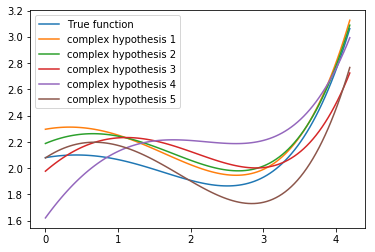

68.22474157254732
1.6696104333496926
63.76188263202176
error: 7.672334989550222e-14
(5, 100)


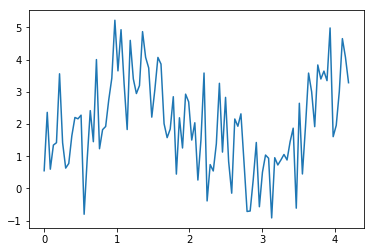

In [37]:
#higher order

X_temp = np.matrix(x).T;
X = (X_temp - np.mean(x))/np.std(x);
ONES = np.matrix(np.ones(len(x))).T;
X2 = np.matrix(np.power(x,2)).T;
X3 = np.matrix(np.power(x,3)).T;
X4 = np.matrix(np.power(x,4)).T;
X2 = (X2 - np.mean(X2))/np.std(X2);
X3 = (X3 - np.mean(X3))/np.std(X3);
X4 = (X4 - np.mean(X4))/np.std(X4);
X = np.concatenate((ONES, X), axis = 1);
X = np.concatenate((X,X2), axis = 1);
X = np.concatenate((X,X3), axis = 1);
X = np.concatenate((X,X4), axis = 1);
#print(X.shape[1])
Y=np.matrix(y)
theta=np.matrix(np.ones(X.shape[1])) .T
theta=GD_high(X,Y.T,theta)
print(theta)
t_f=np.matmul(X,theta)
p.plot(x,t_f,label='True function')
n=5
f = np.zeros((n,len(x)));
for i in range (n):
    mu=0
    sigma=1
    noise = np.random.normal(mu, sigma, [100,1])
    z=Y.T+noise
    theta=GD_high(X,z,theta)
    #print(theta)
    ans=np.matmul(X,theta)
    p.plot(x,ans,label = 'complex hypothesis ' + str(i+1))
    f[i]=ans.T
p.legend()
p.show()
p.plot(X_temp,z)
#print(f)
M=np.mean(f,axis=0)
bias=Y-M
#print(bias)
print(np.sum(abs(bias)))


Variance = np.mean(np.multiply(f,f),axis=0)-np.multiply(M,M) #np.mean(f - np.mean(f, axis = 0),axis = 0);
#print(Variance)
Variance_value = np.sum((Variance));
print(Variance_value)


MSE = np.mean(np.power((Y - f), 2),axis = 0);
#MSE=np.mean(np.multiply(f,f),axis=0)+np.multiply(Y,Y)-2*np.multiply(Y,M)
MSE_value = np.sum((MSE));
print(MSE_value)

error=abs(MSE-np.multiply(bias,bias)-Variance)
print('error:', np.sum(error))
print((f.shape))